In [1]:
import pandas as pd
import requests

data = requests.get(
    'https://ravenclaw-services.herokuapp.com/CRUD/admin/lihat-data-pengajuan')
df = pd.DataFrame(data.json())
df.sample(4)

df['Date'] = df['due'].apply(lambda x:x['due_date'])
df['Close'] = df['bsu'].apply(lambda x:x['bsu_fix'])

In [2]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff


In [3]:
df.head()

,order_id,username,name,divisi,manajer,kategori,aktivitas,status,due,bsu,mitra,metode_pengadaan,Date,Close
0,AO-1665998108,rudinur,Rudi Nur Sulistiyono,AO,Yuyus Nurkamal,CAPEX,Pengadaan Lisensi Oracle,REQUESTED,"{'due_quarter': 'Q3', 'due_date': '2021-03-25'}","{'bsu_kategori': 'fix', 'bsu_fix': 232339996.3...",PT Telkom Indonesia,Pembelian Langsung Terbatas,2021-03-25,2.323400e+08
1,AO-1665998110,rudinur,Rudi Nur Sulistiyono,AO,Tri Widiartono,CAPEX,Pengadaan Cloud Service,ON PROCESS,"{'due_quarter': 'Q3', 'due_date': '2021-03-26'}","{'bsu_kategori': 'fix', 'bsu_fix': 236479995.7...",Google,Pembelian Langsung Terbatas,2021-03-26,2.364800e+08
2,AO-1665998112,rudinur,Rudi Nur Sulistiyono,AO,Tri Widiartono,OPEX,Pengadaan Bootcamp Web Development,REQUESTED,"{'due_quarter': 'Q3', 'due_date': '2021-03-29'}","{'bsu_kategori': 'fix', 'bsu_fix': 235240005.4...",iBox,Penunjukkan Langsung,2021-03-29,2.352400e+08
3,AO-1665998113,rudinur,Rudi Nur Sulistiyono,AO,Yuyus Nurkamal,OPEX,Pengadaan Cloud Service,COMPLETED,"{'due_quarter': 'Q3', 'due_date': '2021-03-30'}","{'bsu_kategori': 'fix', 'bsu_fix': 231850006.1...",Alibaba,Penunjukkan Langsung,2021-03-30,2.318500e+08
4,AO-1665998115,rudinur,Rudi Nur Sulistiyono,AO,Edi Priyatno,CAPEX,Pengadaan Bootcamp Web Development,REQUESTED,"{'due_quarter': 'Q3', 'due_date': '2021-03-31'}","{'bsu_kategori': 'fix', 'bsu_fix': 235770004.2...",Amazon,Pembelian Langsung Terbatas,2021-03-31,2.357700e+08


##### Wordcloud

In [4]:
filtered_words = df['aktivitas'].to_list()

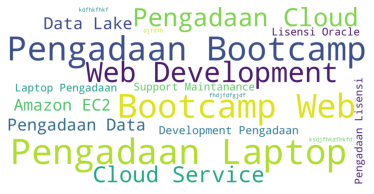

In [5]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# lower max_font_size, change the maximum number of word and lighten the background:

wordcloud = WordCloud(width=4000, height=2000,
                      background_color='white',
                      min_font_size=10).generate(" ".join(filtered_words))

plt.figure(figsize=(9, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('assets/foo.png')


In [6]:
penyerapan_anggaran = df.groupby(['divisi']).sum()[
    'Close'].reset_index()
penyerapan_anggaran.sort_values(by='Close')


,divisi,Close
0,AO,5.779610e+09
3,ITSG,1.196565e+10
1,DEVOPS,1.991702e+10
2,ITAIS,2.051217e+10


In [7]:
status_count = df.groupby(['status']).count()[
    'Close'].reset_index()
status_count

,status,Close
0,COMPLETED,56
1,ON PROCESS,44
2,PENDING,2
3,REJECTED,46
4,REQUESTED,55


In [8]:
divisi_agg = df.groupby(['divisi']).count()[
    'order_id'].reset_index()
divisi_agg


,divisi,order_id
0,AO,23
1,DEVOPS,77
2,ITAIS,67
3,ITSG,36


In [9]:
fig_bar_gab = px.histogram(df, x='divisi', color='manajer', barmode="group",
                           title=f"Distribusi Kategori per Divisi")
fig_bar_gab.update_layout(width=700, height=800, bargap=0.001)
fig_bar_gab.show()


In [10]:
fig_bar_gab = px.histogram(df, x='kategori', color='divisi', barmode="group",
                           title=f"Distribusi Kategori per Divisi")
fig_bar_gab.update_layout(width=700, height=500, bargap=0.2)
fig_bar_gab.show()


In [11]:
# Use `hole` to create a donut-like pie chart
fig_divisi_top = go.Figure(data=[go.Pie(labels=divisi_agg['divisi'],
                                    values=divisi_agg['order_id'], hole=.5)])
fig_divisi_top.update_layout(width=600, title='Persentase Jumlah Pengajuan Per Divisi')
fig_divisi_top.show()


In [12]:
metode_pengadaan = df.groupby(['metode_pengadaan']).count()['order_id'].reset_index()


In [13]:
metode_pengadaan


,metode_pengadaan,order_id
0,Lelang Terbuka,47
1,Pelelangan Terbatas,1
2,Pelelangan Terbuka,1
3,Pembelian Langsung,55
4,Pembelian Langsung Terbatas,55
5,Penunjukkan Langsung,44


In [14]:
from turtle import width
import plotly.graph_objects as go

# Use `hole` to create a donut-like pie chart
fig_metode = go.Figure(data=[go.Pie(labels=metode_pengadaan['metode_pengadaan'],
                values=metode_pengadaan['order_id'], hole=.5)])
fig_metode.update_layout(width=600, title='Persentase Metode Pengadaan')
fig_metode.show()


In [15]:
top_mitra = df.groupby(['mitra']).count()['order_id'].reset_index()
top_mitra = top_mitra.sort_values(by='order_id')[:10]

In [16]:


mitra_hor_bar = px.bar(x=top_mitra['order_id'],
                     y=top_mitra['mitra'], orientation='h',
                     labels={'x': 'Jumlah Pengadaan', 'y': 'Nama Mitra'})

mitra_hor_bar.update_layout(title_text=f"<b>Top Mitra</b>",
                          width=700, height=500, bargap=0.5)
mitra_hor_bar.show()


In [17]:
# df['kategori'] = df['kategori'].apply(lambda x: x.upper())

In [18]:
# df

In [19]:

status_count

,status,Close
0,COMPLETED,56
1,ON PROCESS,44
2,PENDING,2
3,REJECTED,46
4,REQUESTED,55


In [20]:
penyerapan_anggaran


,divisi,Close
0,AO,5.779610e+09
1,DEVOPS,1.991702e+10
2,ITAIS,2.051217e+10
3,ITSG,1.196565e+10


In [21]:
penyerapan_anggaran['Close'][0]

5779609985.3515625

In [22]:
image_path = 'assets/foo.png'


In [23]:
import dash_html_components as html
import dash_core_components as dcc
import dash
import plotly.graph_objects as go  # or plotly.express as px
fig = go.Figure()  # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )


app = dash.Dash()

app.layout = html.Div(children=[
    html.Div(
        children=[html.H1("Status Pengajuan")],
    ),
    html.Div(
        children=[
            html.Div(
            children=[html.H3(f"{status_count['Close'][0]}"), html.P(
                f"{status_count['status'][0]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#5cb85c', 'color': '#fff','font-family':'Verdana','font-size':'30px'}
        ),
            html.Div(
            children=[html.H3(f"{status_count['Close'][1]}"), html.P(
                f"{status_count['status'][1]}")],
                style={
                       'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#0275d8', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ),
        html.Div(
            children=[html.H3(f"{status_count['Close'][2]}"), html.P(
                f"{status_count['status'][2]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#df4759', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ),
            html.Div(
            children=[html.H3(f"{status_count['Close'][3]}"), html.P(
                f"{status_count['status'][3]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#f0ad4e', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ) ],
        style = {'display': 'flex' , 'align-items': 'center', 'justify-content': 'center','font-family':'Verdana'}
    ),
    html.Div(
        children=[html.H1("Penyerapan Anggaran")],
    ),
    html.Div(
        children=[
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][0]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][0])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124','font-size':'30px'}),
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][1]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][1])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124', 'font-size': '30px'}),
                        html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][2]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][2])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124','font-size':'30px'}),
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][3]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][3])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124', 'font-size': '30px'})
            
        ],
        style={'width': 'max', 'border': '2px solid #A9A9A9',
               'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
    ),
    html.Div(
        children=[html.H1("Predictive Analytics")],
    ),
    html.Div(children=[
        html.Div(children=[
            html.P('WordCloud'),
            html.Img(src=image_path)
        ], style={'width': '800px', 'height':'500px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=fig_divisi_top)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_metode)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=mitra_hor_bar)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),

    html.Div(
        children=[html.H1("Charts")],
    ),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_bar_gab)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=fig_divisi_top)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_metode)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=mitra_hor_bar)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
],
style={'max-width': '1400px', 'margin': '0 auto', 'overflow': 'auto', 'padding': '0 40px', 'font-family':'Verdana'})

# Turn off reloader if inside Jupyter
app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


C:\Users\hafid\AppData\Local\Temp/ipykernel_4040/275236872.py:1: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

C:\Users\hafid\AppData\Local\Temp/ipykernel_4040/275236872.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [18/Oct/2022 14:21:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 14:21:56] "GET /assets/stylesheet.css?m=1666068939.819808 HTTP/1.1" 304 -
127.0.0.1 - - [18/Oct/2022 14:21:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 14:21:56] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 14:21:56] "GET /_favicon.ico?v=2.6.2 HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 14:21:56] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [18/Oct/2022